In [9]:
from abc import ABCMeta, abstractmethod, abstractproperty
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scaler):
        pass

    @abstractmethod
    def add(self, other):
        pass

    def __mul__(self, scalar):
        return self.scale(scalar)
    
    def __rmul__(self, scalar):
        return self.scale(scalar)
    
    def __add__(self, other):
        return self.add(other)
    
    def substract(self, other):
        return self.add(-1 * other)
    
    def __sub__(self, other):
        return self.substract(other)
    
    @classmethod
    @abstractproperty
    def zero():
        pass

    def __neg__(self):
        return self.scale(-1)
    
    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

In [10]:
class Vec2(Vector):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [14]:
Vec2(1,2) / 3.14

Vec2(0.3184713375796178,0.6369426751592356)

In [15]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [16]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s,input_format).replace(year=2018)
    
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2],  car[5],  car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [22]:
average_prius = sum(cars, CarForSale.zero()) / len(cars)
average_prius.__dict__

{'model_year': 2012.5365853658536,
 'mileage': 87731.63414634147,
 'price': 12574.731707317074,
 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

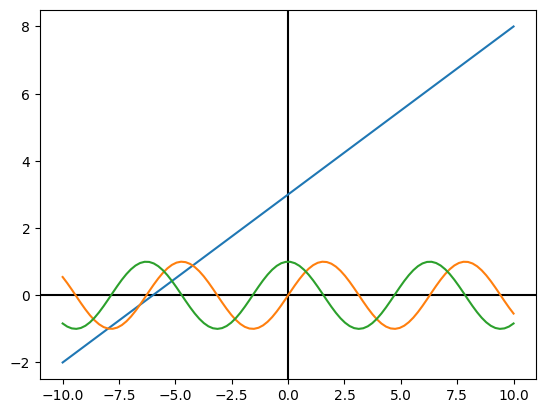

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
def plot(funs, xmin, xmax):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in funs:
        ys = [f(x) for x in xs]
        plt.plot(xs, ys)

def f(x):
    return 0.5 * x + 3

def g(x):
    return math.sin(x)

def s(x):
    return math.cos(x)

plot([f,g,s], -10, 10)

In [32]:
from PIL import Image
class ImageVector(Vector):
    size = (300,300) #1
    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) #2
            self.pixels = img.getdata()
        except:
            self.pixels = input #3
    def image(self):
        img = Image.new('RGB', ImageVector.size) #4
        img.putdata([(int(r), int(g), int(b)) 
                     for (r,g,b) in self.pixels])
        return img
    def add(self,img2): #5
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): #6
        return ImageVector([(scalar*r,scalar*g,scalar*b) 
                      for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0,total_pixels)])
    def _repr_png_(self): #8
        return self.image()._repr_png_()

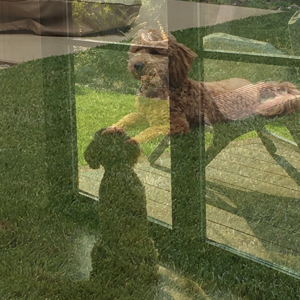

In [43]:
0.5*ImageVector("inside.JPG")+0.5*ImageVector('outside.JPG')

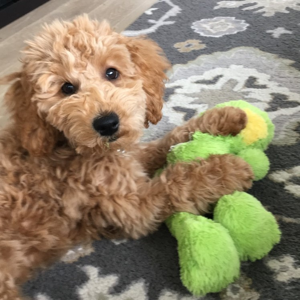

In [45]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])
ImageVector("melba_toy.JPG")


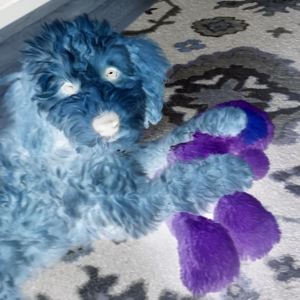

In [46]:
white - ImageVector("melba_toy.JPG")